In [1]:
import numpy as np
import os
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
hdc_file = '/home/hasitha/Desktop/Discharge/fcst_17.csv'
hde_file = '/home/hasitha/Desktop/Discharge/fcst_25.csv'
hlc_file = '/home/hasitha/Desktop/Discharge/fcst_27.csv'
hle_file = '/home/hasitha/Desktop/Discharge/fcst_28.csv'
obs_file = '/home/hasitha/Desktop/Discharge/dis_sf.csv'

In [19]:
def get_dis_val(df, time, model):
    filtered_df = df[(df['time']==time.strftime('%Y-%m-%d %H:%M:%S'))]
    if not filtered_df.empty:
        dis = filtered_df.iloc[0][model]
        return dis
    else:
        return 0.0

In [22]:
def get_dis_df(data_file,ts_start,ts_end,step,model):
    data_df = pd.read_csv(data_file)
    time_series = []
    start_time = datetime.strptime(ts_start, '%Y-%m-%d %H:%M:%S')
    end_time = datetime.strptime(ts_end, '%Y-%m-%d %H:%M:%S')
    time_step = start_time
    while (time_step<= end_time):
        value = float(get_dis_val(data_df, time_step, model))
        time_series.append([time_step, value])
        time_step = time_step + timedelta(minutes=step)
    formatted_df = pd.DataFrame(time_series, columns=['Time',model])
    return formatted_df

In [28]:
hdc_df = get_dis_df(hdc_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HDC')
hde_df = get_dis_df(hde_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HDE')
hlc_df = get_dis_df(hlc_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HLC')
hle_df = get_dis_df(hle_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HLE')
obs_df = get_dis_df(obs_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'Observed')

Text(0,0.5,'Discharge (m3/s)')

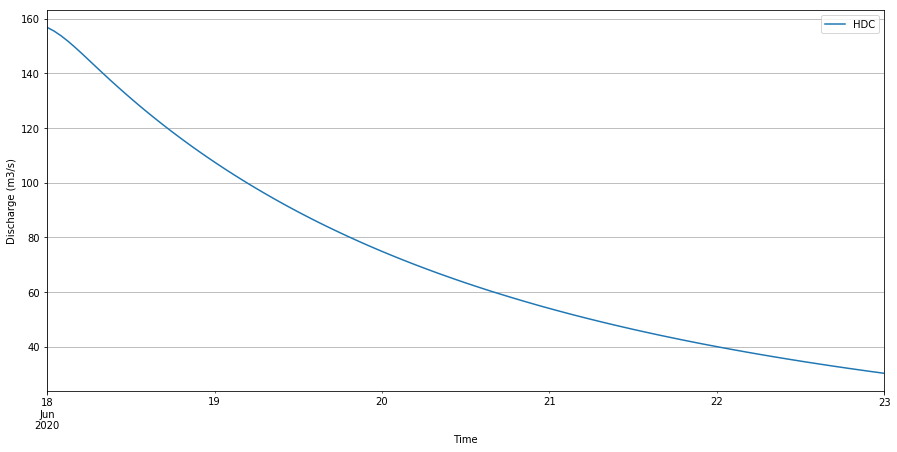

In [29]:
hdc_df.plot(x='Time', y=['HDC'], kind='line', figsize=(15,7), grid=True).set_ylabel('Discharge (m3/s)')

Text(0,0.5,'Discharge (m3/s)')

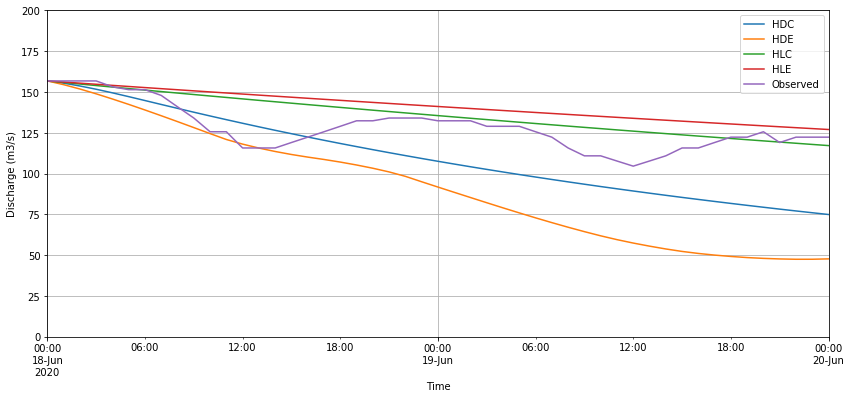

In [44]:
hdc_df = get_dis_df(hdc_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HDC')
hde_df = get_dis_df(hde_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HDE')
hlc_df = get_dis_df(hlc_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HLC')
hle_df = get_dis_df(hle_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'HLE')
obs_df = get_dis_df(obs_file, '2020-06-18 00:00:00', '2020-06-20 00:00:00', 60, 'Observed')
discharge_plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='outer'), [hdc_df,hde_df,hlc_df,hle_df, obs_df])
discharge_plot_df.plot(x='Time', y=['HDC','HDE','HLC','HLE','Observed'], kind='line', figsize=(14,6), grid=True, ylim=(0,200)).set_ylabel('Discharge (m3/s)')

Text(0,0.5,'Discharge (m3/s)')

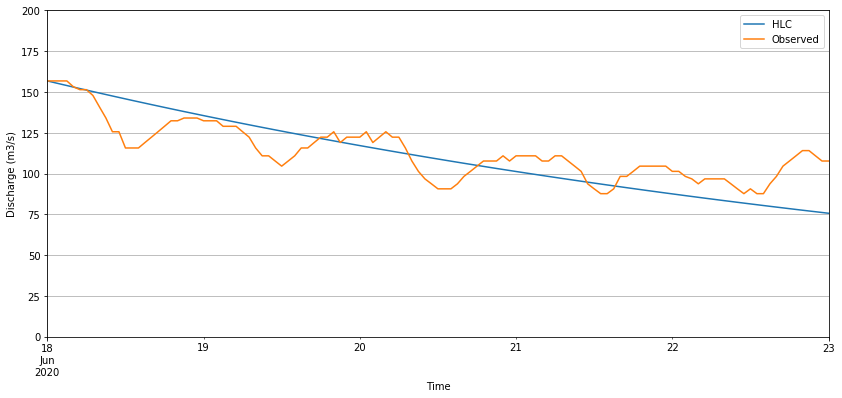

In [46]:
# hdc_df = get_dis_df(hdc_file, '2020-06-20 00:00:00', '2020-06-23 00:00:00', 60, 'HDC')
# hde_df = get_dis_df(hde_file, '2020-06-20 00:00:00', '2020-06-23 00:00:00', 60, 'HDE')
hlc_df = get_dis_df(hlc_file, '2020-06-18 00:00:00', '2020-06-23 00:00:00', 60, 'HLC')
# hle_df = get_dis_df(hle_file, '2020-06-20 00:00:00', '2020-06-23 00:00:00', 60, 'HLE')
obs_df = get_dis_df(obs_file, '2020-06-18 00:00:00', '2020-06-23 00:00:00', 60, 'Observed')
# discharge_plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='outer'), [hdc_df,hde_df,hlc_df,hle_df, obs_df])
# discharge_plot_df.plot(x='Time', y=['HDC','HDE','HLC','HLE','Observed'], kind='line', figsize=(15,7), grid=True).set_ylabel('Discharge (m3/s)')
discharge_plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='outer'), [hlc_df,obs_df])
discharge_plot_df.plot(x='Time', y=['HLC','Observed'], kind='line', figsize=(14,6), grid=True, ylim=(0,200)).set_ylabel('Discharge (m3/s)')

Text(0,0.5,'Discharge (m3/s)')

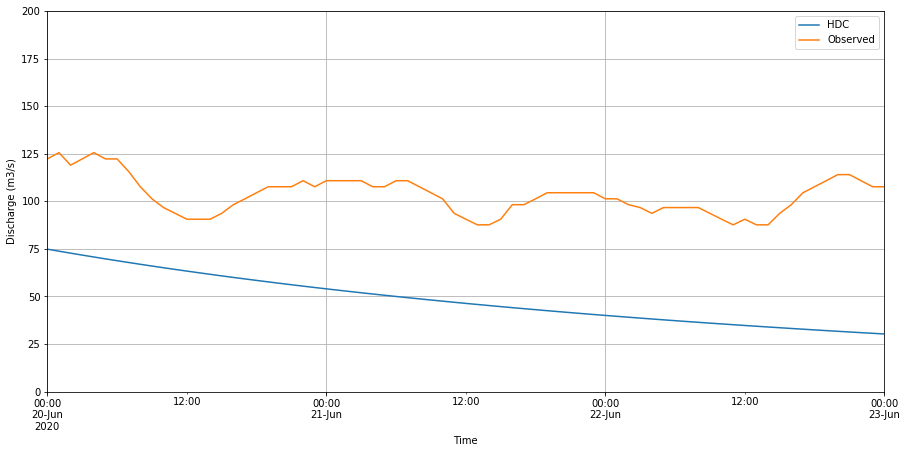

In [42]:
hdc_df = get_dis_df(hdc_file, '2020-06-20 00:00:00', '2020-06-23 00:00:00', 60, 'HDC')
# hde_df = get_dis_df(hde_file, '2020-06-20 00:00:00', '2020-06-23 00:00:00', 60, 'HDE')
# hlc_df = get_dis_df(hlc_file, '2020-06-20 18:00:00', '2020-06-23 00:00:00', 60, 'HLC')
# hle_df = get_dis_df(hle_file, '2020-06-20 00:00:00', '2020-06-23 00:00:00', 60, 'HLE')
obs_df = get_dis_df(obs_file, '2020-06-20 00:00:00', '2020-06-23 00:00:00', 60, 'Observed')
# discharge_plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='outer'), [hdc_df,hde_df,hlc_df,hle_df, obs_df])
# discharge_plot_df.plot(x='Time', y=['HDC','HDE','HLC','HLE','Observed'], kind='line', figsize=(15,7), grid=True).set_ylabel('Discharge (m3/s)')
discharge_plot_df = reduce(lambda x,y: pd.merge(x,y, on='Time', how='outer'), [hdc_df,obs_df])
discharge_plot_df.plot(x='Time', y=['HDC','Observed'], kind='line', figsize=(15,7), grid=True, ylim=(0,200)).set_ylabel('Discharge (m3/s)')